# **Aplicación de los Tipos Segmentaciones**

## Creación del Código a Utilizar

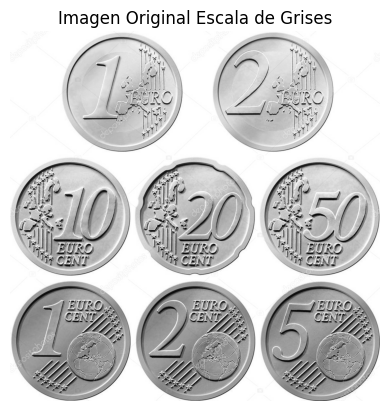

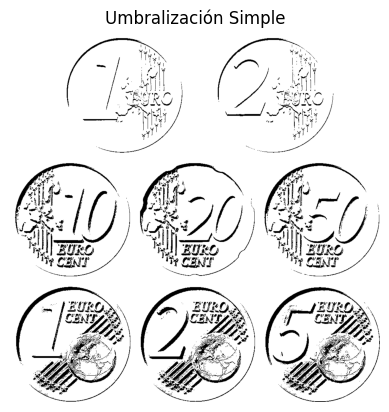

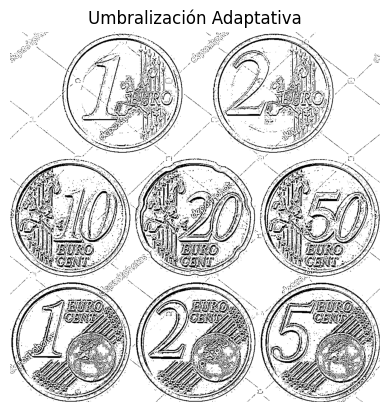

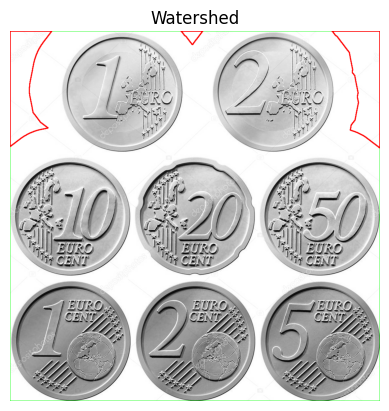

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
class ImageProcessor:
    def __init__(self, ruta):
        self.ruta = ruta
        self.imagen_original = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
        if self.imagen_original is None:
            raise ValueError(f"No se pudo cargar la imagen desde la ruta: {ruta}")
        self.imagen_umbralizada_simple = None
        self.imagen_umbralizada_adaptativa = None
        self.imagen_aplicada_watershed = None

    def mostrar_imagen(self, imagen, titulo):
        plt.imshow(imagen, cmap='gray')
        plt.title(titulo)
        plt.axis('off')
        plt.show()

    def umbralizacion_simple(self, umbral=127, maxvalue=255):
        _, self.imagen_umbralizada_simple = cv2.threshold(self.imagen_original, umbral, maxvalue, cv2.THRESH_BINARY)
        return self.imagen_umbralizada_simple

    def umbralizacion_adaptativa(self, maxvalue=255, window_size=11, constante=5):
        self.imagen_umbralizada_adaptativa = cv2.adaptiveThreshold(self.imagen_original, maxvalue, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, window_size, constante)
        return self.imagen_umbralizada_adaptativa
    
    def aplicación_watershed(self, umbral=127, maxvalue=255):
        imagen_gaussian_blur = cv2.GaussianBlur(self.imagen_original, (5, 5), 3)
        _, imagen_umbralizada = cv2.threshold(imagen_gaussian_blur, umbral, maxvalue, cv2.THRESH_BINARY)
        
        kernel = np.ones((3, 3), np.uint8)
        apertura_morfologica = cv2.morphologyEx(imagen_umbralizada, cv2.MORPH_OPEN, kernel, iterations=2)
        dilatacion = cv2.dilate(apertura_morfologica, kernel, iterations=3)
        dist_transformacion = cv2.distanceTransform(imagen_umbralizada, cv2.DIST_L2, 5)
        _, sure_fg = cv2.threshold(dist_transformacion, 0.5 * dist_transformacion.max(), 255, 0)
        sure_fg = np.uint8(sure_fg)
        unkonwn = cv2.subtract(sure_fg, dilatacion)
        markers = np.zeros_like(imagen_umbralizada, dtype=np.int32)
        markers[sure_fg == 255] = 1
        markers[unkonwn == 255] = 0
        imagen_bgr = cv2.cvtColor(self.imagen_original, cv2.COLOR_GRAY2BGR)
        markers = cv2.watershed(imagen_bgr, markers)
        imagen_bgr[markers == -1] = [0, 255, 0]
        dibujar_contornos, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(imagen_bgr, dibujar_contornos, -1, (255, 0 , 0), 2)
        self.imagen_aplicada_watershed = imagen_bgr
        return self.imagen_aplicada_watershed

    def

    def procesar_imagen(self):
        self.mostrar_imagen(self.imagen_original, 'Imagen Original Escala de Grises')

        self.umbralizacion_simple()
        self.mostrar_imagen(self.imagen_umbralizada_simple, 'Umbralización Simple')

        self.umbralizacion_adaptativa()
        self.mostrar_imagen(self.imagen_umbralizada_adaptativa, 'Umbralización Adaptativa')

        self.aplicación_watershed()
        self.mostrar_imagen(self.imagen_aplicada_watershed, 'Watershed')


if __name__ == "__main__":
    ruta_imagen = 'euros.png'
    procesador = ImageProcessor(ruta_imagen)
    procesador.procesar_imagen()